In [123]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [124]:
data_path = 'data/smartwatches.csv'
df = pd.read_csv(data_path)
df.drop_duplicates(inplace=True)
# train_df = df.sample(frac=0.8, random_state=42)
# test_df = df.drop(train_df.index)
# train_df.reset_index(drop=True, inplace=True)
# test_df.reset_index(drop=True, inplace=True)

train_df = df.copy()


In [125]:
df.shape, train_df.shape, test_df.shape

((450, 16), (450, 16), (90, 16))

In [126]:
train_df.head()

,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [127]:
train_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [128]:
train_df['Display Size'].isna().sum()

30

In [129]:
train_df['Display Size'].value_counts().count()

40

In [130]:
train_df['Display Size'].fillna('0.0 inches', inplace=True)

C:\Users\satya\AppData\Local\Temp\ipykernel_1832\2982374164.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Display Size'].fillna('0.0 inches', inplace=True)


In [131]:
train_df['Display Size'] = train_df['Display Size'].apply(lambda x: float(x.split()[0]))

In [132]:
train_df['Display Size'].head()

0    0.0
1    1.8
2    1.7
3    1.8
4    1.7
Name: Display Size, dtype: float64

In [133]:
train_df['Display Size'] = train_df['Display Size'].replace(0.0, np.nan)

In [134]:
train_df['Display Size'].isna().sum()

31

In [135]:
train_df['Weight'].head(10)

0    35 - 50 g
1    50 - 75 g
2    35 - 50 g
3        75g +
4    35 - 50 g
5    35 - 50 g
6    35 - 50 g
7    35 - 50 g
8    35 - 50 g
9    35 - 50 g
Name: Weight, dtype: object

In [136]:
train_df['Weight'].value_counts()

Weight
20 - 35 g    80
75g +        66
35 - 50 g    58
<= 20 g      43
50 - 75 g    17
Name: count, dtype: int64

In [137]:
for i in train_df['Weight'].unique():
    if i is np.nan:
        continue
    cal = sum(int(x) for x in re.findall(r'\d+', i))/len(re.findall(r'\d+', i))
    train_df['Weight'] = train_df['Weight'].replace(i, cal)

C:\Users\satya\AppData\Local\Temp\ipykernel_1832\1194580094.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Weight'] = train_df['Weight'].replace(i, cal)


In [138]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                450 non-null    object 
 1   Current Price        440 non-null    float64
 2   Original Price       377 non-null    float64
 3   Discount Percentage  377 non-null    float64
 4   Rating               444 non-null    float64
 5   Number OF Ratings    391 non-null    float64
 6   Model Name           415 non-null    object 
 7   Dial Shape           327 non-null    object 
 8   Strap Color          327 non-null    object 
 9   Strap Material       381 non-null    object 
 10  Touchscreen          413 non-null    object 
 11  Battery Life (Days)  418 non-null    float64
 12  Bluetooth            444 non-null    object 
 13  Display Size         419 non-null    float64
 14  Weight               264 non-null    float64
dtypes: float64(8), object(7)
memory usage: 5

In [139]:
train_df['Discount Price'] = (train_df['Original Price']*(-train_df['Discount Percentage']))/100
train_df.drop(['Discount Percentage'], axis=1, inplace=True)

In [140]:
numerical_data = train_df.select_dtypes(include=[np.number])

In [141]:
numerical_data


,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
0,82990.0,89900.0,4.0,65.0,8.0,NaN,42.5,-6910.000000
1,3799.0,16999.0,4.3,20788.0,3.5,1.8,62.5,-13200.000001
2,1999.0,7990.0,3.8,21724.0,8.0,1.7,42.5,-5991.000000
3,1799.0,19999.0,4.3,13244.0,3.5,1.8,75.0,-18200.000000
4,1599.0,4999.0,4.1,13901.0,8.0,1.7,42.5,-3400.000000
...,...,...,...,...,...,...,...,...
445,5999.0,8999.0,2.5,NaN,22.0,1.3,NaN,-3000.000000
446,3700.0,9999.0,NaN,NaN,8.0,0.1,NaN,-6299.000000
447,5999.0,8999.0,2.5,NaN,22.0,1.3,NaN,-3000.000000
448,3200.0,7999.0,NaN,NaN,22.0,0.1,NaN,-4799.000000


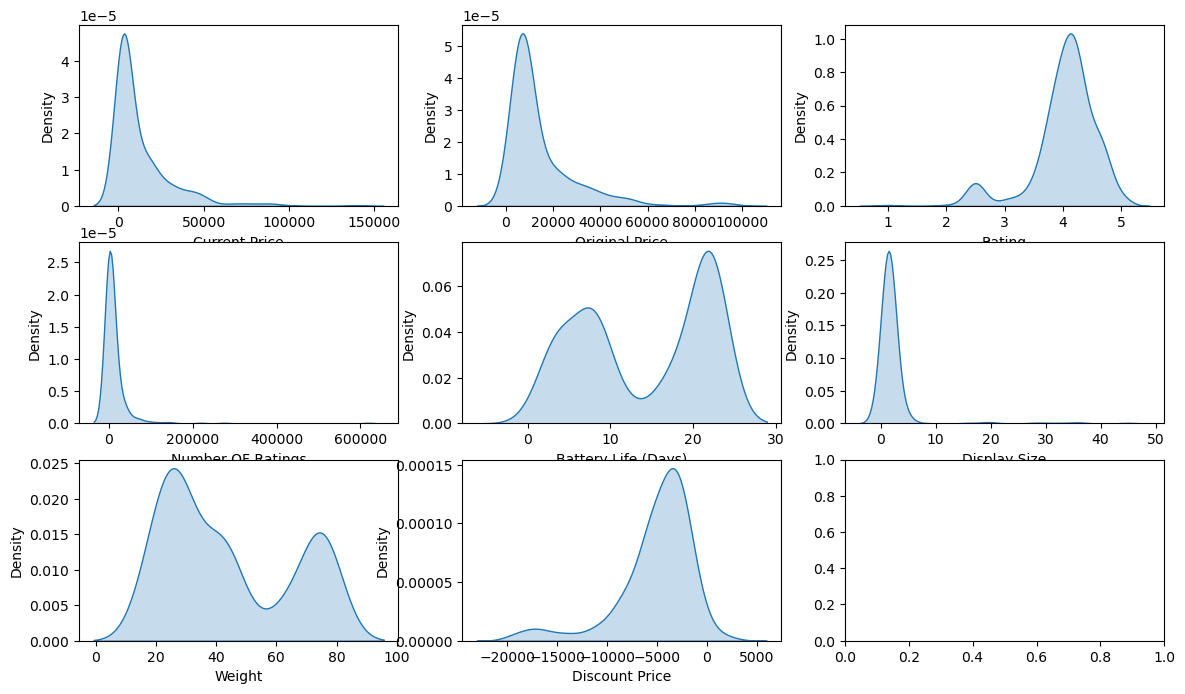

In [142]:
fig, axes = plt.subplots(3, 3, figsize=(14, 8))
for i, column in enumerate(numerical_data.columns):
    row = i//3
    col = i%3
    ax = axes[row, col]
    sns.kdeplot(data=train_df[column], ax=ax, fill=True)


plt.show()

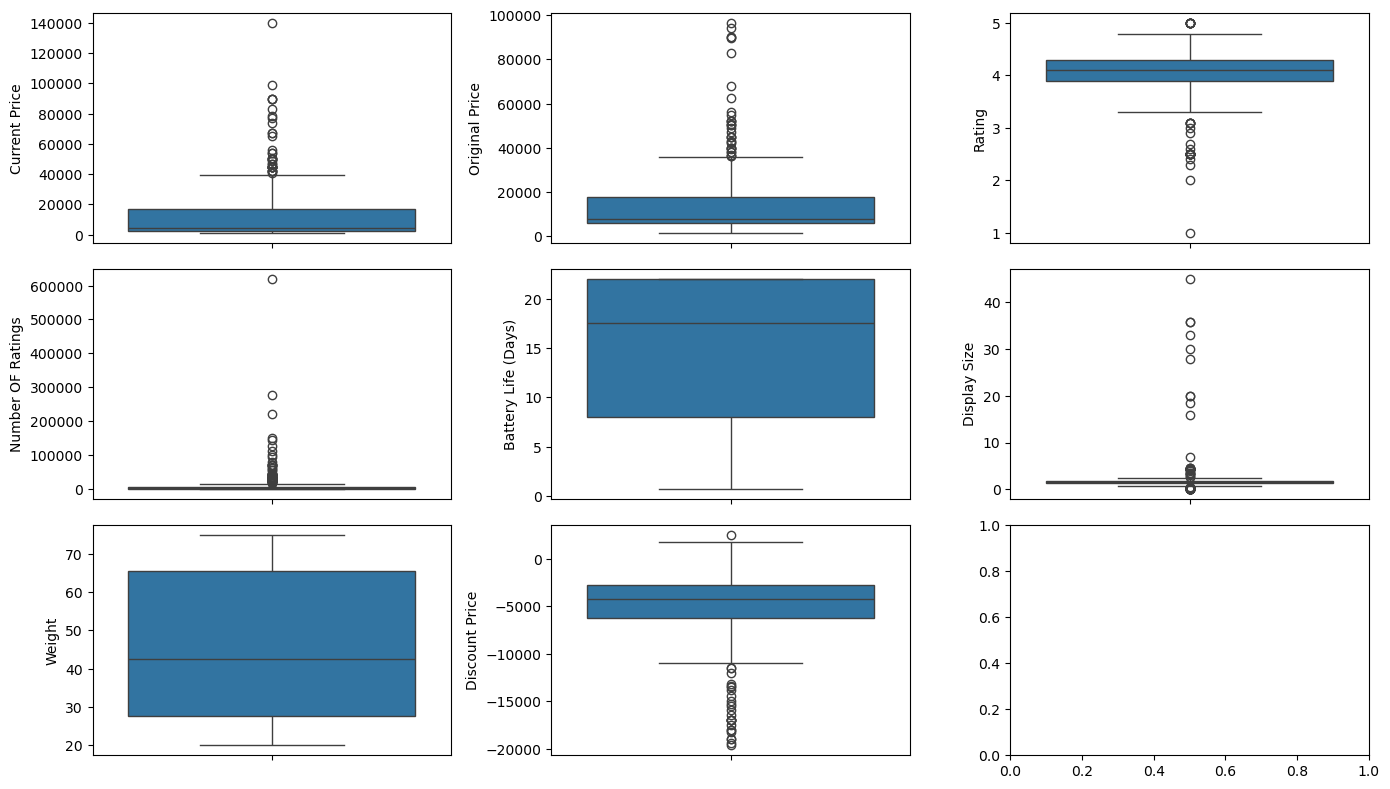

In [143]:
fig, axes = plt.subplots(3, 3, figsize=(14, 8))
for i, column in enumerate(numerical_data.columns):
    row = i//3
    col = i%3
    ax = axes[row, col]
    sns.boxplot(data=train_df[column], ax=ax)

fig.tight_layout()
plt.show()

In [144]:
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] > lower_bound) & (df[column] < upper_bound)]

In [145]:
imp_columns = ['Original Price', 'Current Price','Rating','Number OF Ratings', 'Display Size']

In [146]:
for col in imp_columns:
    train_df = remove_outliers(train_df, col)

In [147]:
for col in numerical_data.columns:
    print(col)
    train_df[col] = train_df[col].fillna(train_df[col].median())

Current Price
Original Price
Rating
Number OF Ratings
Battery Life (Days)
Display Size
Weight
Discount Price


In [148]:
train_df.isna().sum()

Brand                   0
Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Model Name              9
Dial Shape             63
Strap Color            63
Strap Material         26
Touchscreen             5
Battery Life (Days)     0
Bluetooth               0
Display Size            0
Weight                  0
Discount Price          0
dtype: int64

In [149]:
train_df.shape

(160, 15)

In [150]:
numerical_data.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
0,82990.0,89900.0,4.0,65.0,8.0,NaN,42.5,-6910.000000
1,3799.0,16999.0,4.3,20788.0,3.5,1.8,62.5,-13200.000001
2,1999.0,7990.0,3.8,21724.0,8.0,1.7,42.5,-5991.000000
3,1799.0,19999.0,4.3,13244.0,3.5,1.8,75.0,-18200.000000
4,1599.0,4999.0,4.1,13901.0,8.0,1.7,42.5,-3400.000000


In [151]:
numerical_data = numerical_data.fillna(numerical_data.median())
numerical_data.describe()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,12553.142222,13527.666667,4.032222,10205.115556,14.320778,2.136667,43.205556,-4997.751111
std,17609.161734,14346.636604,0.546914,37844.309730,7.490319,4.233530,16.077294,3507.387663
min,1199.000000,1669.000000,1.000000,1.000000,0.750000,0.100000,20.000000,-19588.999998
25%,2199.000000,5999.000000,3.900000,100.000000,8.000000,1.300000,27.500000,-5997.749999
50%,3999.000000,7999.000000,4.100000,996.000000,17.500000,1.600000,42.500000,-4200.000000
75%,16999.000000,13749.000000,4.300000,5228.000000,22.000000,1.800000,42.500000,-3000.000000
max,139990.000000,96390.000000,5.000000,619130.000000,22.000000,45.000000,75.000000,2500.000000


In [152]:
from sklearn.preprocessing import MinMaxScaler

In [153]:
scaler = MinMaxScaler()
scale_data = scaler.fit_transform(numerical_data[:-1])
scale_data

array([[0.58931055, 0.93148299, 0.75      , ..., 0.03340757, 0.40909091,
        0.57399611],
       [0.0187332 , 0.16184373, 0.825     , ..., 0.03786192, 0.77272727,
        0.28923899],
       [0.00576406, 0.06673283, 0.7       , ..., 0.03563474, 0.40909091,
        0.61560053],
       ...,
       [0.0180199 , 0.08794248, 0.775     , ..., 0.        , 0.40909091,
        0.60165693],
       [0.03458438, 0.07738516, 0.375     , ..., 0.02672606, 0.40909091,
        0.75100729],
       [0.01441736, 0.06682784, 0.775     , ..., 0.        , 0.40909091,
        0.66956404]])

In [154]:
scale_data = pd.DataFrame(scale_data, columns=numerical_data.columns)

In [155]:
scale_data.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
0,0.589311,0.931483,0.750,0.000103,0.341176,0.033408,0.409091,0.573996
1,0.018733,0.161844,0.825,0.033575,0.129412,0.037862,0.772727,0.289239
2,0.005764,0.066733,0.700,0.035086,0.341176,0.035635,0.409091,0.615601
3,0.004323,0.193516,0.825,0.021390,0.129412,0.037862,1.000000,0.062882
4,0.002882,0.035156,0.775,0.022451,0.341176,0.035635,0.409091,0.732899


In [156]:
scale_data.isna().sum()

Current Price          0
Original Price         0
Rating                 0
Number OF Ratings      0
Battery Life (Days)    0
Display Size           0
Weight                 0
Discount Price         0
dtype: int64

In [157]:
train_df.drop(numerical_data.columns, axis=1, inplace=True)

In [158]:
train_df.head()

,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth
1,fire-boltt,BSW046,NaN,NaN,Silicon,Yes,Yes
2,boat,Wave Call,NaN,NaN,Silicon,Yes,Yes
3,fire-boltt,BSW053,NaN,NaN,Silicon,Yes,Yes
4,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,Yes
5,noise,NSW-05,NaN,NaN,Other,Yes,Yes


In [159]:
train_df = pd.concat([train_df, scale_data], axis=1)

##Categorical Column

In [165]:
categorical_data = train_df.select_dtypes(include=[object])

In [166]:
categorical_data.head()

,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth
1,fire-boltt,BSW046,NaN,NaN,Silicon,Yes,Yes
2,boat,Wave Call,NaN,NaN,Silicon,Yes,Yes
3,fire-boltt,BSW053,NaN,NaN,Silicon,Yes,Yes
4,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,Yes
5,noise,NSW-05,NaN,NaN,Other,Yes,Yes


In [175]:
categorical_data.isna().sum()

Brand             289
Model Name        298
Dial Shape        352
Strap Color       352
Strap Material    315
Touchscreen       294
Bluetooth         289
dtype: int64

In [174]:
train_df['Bluetooth'].value_counts()

Bluetooth
Yes    160
Name: count, dtype: int64

In [178]:
categorical_data.drop(['Bluetooth'], axis=1, inplace=True)

In [179]:
categorical_data.shape

(449, 6)

In [180]:
from scipy.stats import f_oneway

In [183]:
for col in categorical_data.columns:
    CategoricalGroupList = train_df.groupby(col)['Discount Price'].apply(list)
    AnovaResults = f_oneway(*CategoricalGroupList)
    print(f'Anova test for {col} is {AnovaResults[1]}')

Anova test for Brand is 1.2431810232693376e-15
Anova test for Model Name is 4.055691932514663e-05
Anova test for Dial Shape is 0.0007611674239869131
Anova test for Strap Color is 0.014665803796161383
Anova test for Strap Material is 0.00039407125796962837
Anova test for Touchscreen is 0.9598128707062954


In [184]:
imp_col = ['Brand', 'Model Name', 'Dial Shape', 'Strap Material', 'Strap Color']

In [186]:
train_df[imp_col].head()

,Brand,Model Name,Dial Shape,Strap Material,Strap Color
1,fire-boltt,BSW046,NaN,Silicon,NaN
2,boat,Wave Call,NaN,Silicon,NaN
3,fire-boltt,BSW053,NaN,Silicon,NaN
4,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,Other,NaN
5,noise,NSW-05,NaN,Other,NaN


In [188]:
for col in imp_col:
    train_df[col]=train_df[col].fillna('other')

In [192]:
train_df.isna().sum()

Brand                  0
Model Name             0
Dial Shape             0
Strap Color            0
Strap Material         0
Current Price          0
Original Price         0
Rating                 0
Number OF Ratings      0
Battery Life (Days)    0
Display Size           0
Weight                 0
Discount Price         0
dtype: int64

In [191]:
train_df.drop(['Touchscreen','Bluetooth'], axis=1, inplace=True)

In [194]:
brand = pd.get_dummies(train_df['Brand']).drop('other', axis=1)
dial_shape = pd.get_dummies(train_df['Dial Shape']).drop('other', axis=1)
strap_color = pd.get_dummies(train_df['Strap Color']).drop('other', axis=1)
strap_material = pd.get_dummies(train_df['Strap Material']).drop('other', axis=1)

In [195]:
imp_df = pd.concat([brand, dial_shape, strap_color, strap_material], axis=1)

In [196]:
new_df = pd.concat([train_df[numerical_data.columns], imp_df], axis=1)

In [197]:
new_df

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price,amazfit,ambrane,...,Fluoroelastomer,Leather,Metal,Other,Plastic,Rubber,Silicon,Stainless Steel,Synthetic,Thermo Plastic Polyurethene
1,0.018733,0.161844,0.825,0.033575,0.129412,0.037862,0.772727,0.289239,False,False,...,False,False,False,False,False,False,True,False,False,False
2,0.005764,0.066733,0.700,0.035086,0.341176,0.035635,0.409091,0.615601,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.004323,0.193516,0.825,0.021390,0.129412,0.037862,1.000000,0.062882,False,False,...,False,False,False,False,False,False,True,False,False,False
4,0.002882,0.035156,0.775,0.022451,0.341176,0.035635,0.409091,0.732899,False,False,...,False,False,False,True,False,False,False,False,False,False
5,0.002162,0.024599,0.750,0.052821,0.341176,0.035635,0.409091,0.773643,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,0.041789,0.151286,0.400,0.001607,0.341176,0.028953,0.409091,0.479379,False,False,...,False,False,False,False,False,False,False,False,False,False
445,0.034584,0.077385,0.375,0.001607,1.000000,0.026726,0.409091,0.751007,False,False,...,False,False,False,False,False,False,False,False,False,False
446,0.018020,0.087942,0.775,0.001607,0.341176,0.000000,0.409091,0.601657,False,False,...,False,False,False,False,False,False,False,False,False,False
447,0.034584,0.077385,0.375,0.001607,1.000000,0.026726,0.409091,0.751007,False,False,...,False,False,False,False,False,False,False,False,False,False


In [198]:
new_df.isna().sum()

Current Price                  0
Original Price                 0
Rating                         0
Number OF Ratings              0
Battery Life (Days)            0
Display Size                   0
Weight                         0
Discount Price                 0
amazfit                        0
ambrane                        0
boat                           0
crossbeats                     0
dizo                           0
fire-boltt                     0
fitbit                         0
fossil                         0
gizmore                        0
hammer                         0
honor                          0
huawei                         0
noise                          0
pebble                         0
zebronics                      0
Circle                         0
Rectangle                      0
Square                         0
Beige                          0
Black                          0
Blue                           0
Brown                          0
Burgundy  

In [199]:
new_df.to_csv('data/clean_data.csv', index=False)